<a href="https://colab.research.google.com/github/dhivyasreedhar/FakeTweetDetection/blob/main/twitter_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#loading basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import re
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [49]:
#loading dataset

data = pd.read_csv('/content/train1.csv',encoding='mac_roman')
test_data = pd.read_csv('/content/test1.csv',encoding='mac_roman')

In [50]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [51]:
#viewing data
data.tail()

,id,tweet,label
6415,6416,A tiger tested positive for COVID-19 please st...,0
6416,6417,???Autopsies prove that COVID-19 is??? a blood...,0
6417,6418,_A post claims a COVID-19 vaccine has already ...,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,0
6419,6420,It has been 93 days since the last case of COV...,1


In [52]:
#viewing data
test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 150.6+ KB


In [54]:
data.shape

(6420, 3)

In [55]:
test_data.shape

(2140, 2)

In [56]:
data.duplicated().sum()

0

In [57]:
test_data.duplicated().sum()

0

In [58]:
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

In [59]:
test_data.isna().sum()

id       0
tweet    0
dtype: int64

In [60]:
target_data = data['label']
target_data = np.array(target_data)
target_data

array([1, 1, 0, ..., 0, 0, 1])

In [61]:
text_data = data.tweet.values
text_data

array(['The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.',
       'States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux',
       'Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville',
       ...,
       '_A post claims a COVID-19 vaccine has already been developed and will cause widespread infertility._',
       'Aamir Khan Donate 250 Cr. In PM Relief Cares Fund',
       'It has been 93 days since the last case of COVID-19 was acquired locally from an unknown source. The total number of active cases of COVID-19 in New Zealandís managed isolation and quarantine facilities is now 25.'],
      dtype=object)

In [62]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [63]:
test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


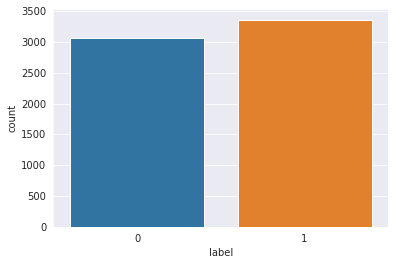

In [64]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x=data.label)
plt.show()

In [65]:
#Text Preprocessing
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
#(1) Remove #, @chunk, urls, shortwords(length is either 1 or 2), stopwords
at_chunk = re.compile(r"@[a-zA-Z0-9]*")
url = re.compile(r"https?:/+[a-zA-Z0-9./]*")
shortword = re.compile(r"\b\w{1,2}\b")

stop_words = set(stopwords.words('english'))

def clean(text):
    text = re.sub('#','',text)
    text = re.sub(at_chunk,'',text)
    text = re.sub(url,'',text)
    text = re.sub(shortword,'',text)
    
    text = text.split()
    text = [w for w in text if w not in stop_words]
    
    text = " ".join(text)
    text = text.strip()
    
    return text

In [67]:
data.tweet = data.tweet.apply(clean)

In [68]:
data.tweet.head()

0    The CDC currently reports 99031 deaths. genera...
1    States reported 1121 deaths small rise last Tu...
2    Politically Correct Woman (Almost) Uses Pandem...
3    IndiaFightsCorona: 1524 COVID testing laborato...
4    Populous states generate large case counts loo...
Name: tweet, dtype: object

In [69]:
test_data.tweet = test_data.tweet.apply(clean)

In [70]:
test_data.tweet.head()

0    Our daily update published. States reported 73...
1                                 Alfalfa cure COVID-.
2    President Trump Asked What Would Were Catch Th...
3    States reported 630 deaths. still seeing solid...
4    This sixth time global health emergency declar...
Name: tweet, dtype: object

In [71]:
#2 Check NULL
data.tweet.isnull().any()

False

In [72]:
test_data.tweet.isnull().any()

False

In [73]:
#3 Tokenizer
tok = Tokenizer()

train_tweet = data.tweet
train_label = data.label
test_tweet = test_data.tweet

tok.fit_on_texts(train_tweet)

word_size = len(tok.index_word)
vocab_size = word_size+1

print(f"{word_size} words are used!")

print("Tokenizing train texts\n")
train_tweet = tok.texts_to_sequences(train_tweet)
print("Tokenizing train texts finished!\n")

print("Tokenizng test texts with the same tokenizer\n")
test_tweet = tok.texts_to_sequences(test_tweet)
print("Tokenizing test texts finished!\n")

14104 words are used!
Tokenizing train texts

Tokenizing train texts finished!

Tokenizng test texts with the same tokenizer

Tokenizing test texts finished!



Max of sequence size >> 884
Average of sequence size >> 16


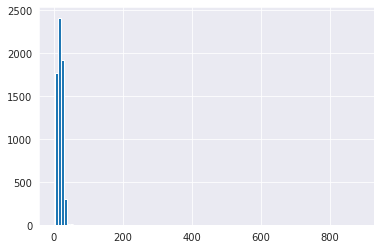

In [74]:
#4 padding
lengths = [len(s) for s in train_tweet]
print(f"Max of sequence size >> {np.max(lengths)}")
print(f"Average of sequence size >> {int(np.round(np.mean(lengths)))}")

plt.hist(lengths,bins=100)
plt.show()

sequence_size=21

In [75]:
train_tweet = pad_sequences(train_tweet,maxlen=sequence_size,padding='post',truncating='post')
test_tweet = pad_sequences(test_tweet,maxlen=sequence_size,padding='post',truncating='post')

print(f"train text shape >> {train_tweet.shape}")
print(f"test text shape >> {test_tweet.shape}")

train text shape >> (6420, 21)
test text shape >> (2140, 21)


In [76]:
train_data = train_tweet
test_data = test_tweet

In [77]:
#Bidirectional stacked LSTM without pre-trained Embedding Vectors from GLOVE : return only last hidden cell on the last lstm layer
from keras.layers import Input,Embedding,Bidirectional,LSTM,TimeDistributed,Dense,Dropout,BatchNormalization,GlobalMaxPool1D,GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from keras.models import Model

#vocab_size
#sequence_size
word_vec_size = 128
hidden_size = 128

def create_lstm1():
    X = Input(shape=[sequence_size])
    
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size,mask_zero=True)(X)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=False))(H)
    H = BatchNormalization()(H)
    H = Dense(32,activation='relu')(H)
    H = BatchNormalization()(H)
    
    Y = Dense(1,activation='sigmoid')(H)
    
    model = Model(X,Y)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [78]:
lstm1 = create_lstm1()
hist = lstm1.fit(train_data,train_label,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
181/181 [==============================] - 53s 203ms/step - loss: 0.3966 - accuracy: 0.8251 - val_loss: 0.5442 - val_accuracy: 0.8879
Epoch 2/10
181/181 [==============================] - 32s 175ms/step - loss: 0.0966 - accuracy: 0.9702 - val_loss: 0.3695 - val_accuracy: 0.8707
Epoch 3/10
181/181 [==============================] - 32s 175ms/step - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.2650 - val_accuracy: 0.8972
Epoch 4/10
181/181 [==============================] - 32s 175ms/step - loss: 0.0438 - accuracy: 0.9851 - val_loss: 0.3522 - val_accuracy: 0.8894
Epoch 5/10
181/181 [==============================] - 32s 174ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.3406 - val_accuracy: 0.9097
Epoch 6/10
181/181 [==============================] - 31s 174ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.4362 - val_accuracy: 0.9050
Epoch 7/10
181/181 [==============================] - 31s 174ms/step - loss: 0.0097 - accuracy: 0.9959 - val_loss: 0.4347 - val_ac

In [79]:
#Bidirectional Stacked LSTM model without using pre-trained Embedding Vectors : return all the hidden cells and use global average pooling
def create_lstm2():
    X = Input(shape=[sequence_size])
    
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size,mask_zero=True)(X)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = GlobalAveragePooling1D()(H)
    H = BatchNormalization()(H)
    H = Dense(32,activation='relu')(H)
    H = BatchNormalization()(H)
    
    Y = Dense(1,activation='sigmoid')(H)
    
    model = Model(X,Y)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [80]:
lstm2 = create_lstm2()
hist = lstm2.fit(train_data,train_label,validation_split=0.1,epochs=10,batch_size=32)

Epoch 1/10
181/181 [==============================] - 52s 203ms/step - loss: 0.3763 - accuracy: 0.8300 - val_loss: 0.5713 - val_accuracy: 0.6168
Epoch 2/10
181/181 [==============================] - 31s 172ms/step - loss: 0.0940 - accuracy: 0.9667 - val_loss: 0.3750 - val_accuracy: 0.8894
Epoch 3/10
181/181 [==============================] - 31s 172ms/step - loss: 0.0516 - accuracy: 0.9823 - val_loss: 0.2567 - val_accuracy: 0.8972
Epoch 4/10
181/181 [==============================] - 31s 171ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.3350 - val_accuracy: 0.9034
Epoch 5/10
181/181 [==============================] - 31s 171ms/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.4899 - val_accuracy: 0.8972
Epoch 6/10
181/181 [==============================] - 31s 171ms/step - loss: 0.0155 - accuracy: 0.9945 - val_loss: 0.4688 - val_accuracy: 0.9003
Epoch 7/10
181/181 [==============================] - 31s 172ms/step - loss: 0.0297 - accuracy: 0.9898 - val_loss: 0.5017 - val_ac

In [81]:
#Bidirectional Stacked LSTM model without using pre-trained Embedding Vectors : return all the hidden cells and use global max pooling
def create_lstm3():
    X = Input(shape=[sequence_size])
    
    H = Embedding(vocab_size,word_vec_size,input_length=sequence_size,mask_zero=True)(X)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = Dropout(0.1)(H)
    H = Bidirectional(LSTM(hidden_size,return_sequences=True))(H)
    H = GlobalMaxPool1D()(H)
    H = BatchNormalization()(H)
    H = Dense(32,activation='relu')(H)
    H = BatchNormalization()(H)
    
    Y = Dense(1,activation='sigmoid')(H)
    
    model = Model(X,Y)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [82]:
lstm3 = create_lstm3()
hist = lstm3.fit(train_data,train_label,validation_split=0.1,epochs=7,batch_size=32)

Epoch 1/7
181/181 [==============================] - 52s 201ms/step - loss: 0.4156 - accuracy: 0.8045 - val_loss: 0.5758 - val_accuracy: 0.9143
Epoch 2/7
181/181 [==============================] - 31s 173ms/step - loss: 0.0880 - accuracy: 0.9697 - val_loss: 0.3534 - val_accuracy: 0.9174
Epoch 3/7
181/181 [==============================] - 31s 172ms/step - loss: 0.0390 - accuracy: 0.9896 - val_loss: 0.2659 - val_accuracy: 0.8972
Epoch 4/7
181/181 [==============================] - 31s 172ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.3194 - val_accuracy: 0.9174
Epoch 5/7
181/181 [==============================] - 31s 174ms/step - loss: 0.0238 - accuracy: 0.9917 - val_loss: 0.4019 - val_accuracy: 0.9065
Epoch 6/7
181/181 [==============================] - 31s 174ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.4645 - val_accuracy: 0.9081
Epoch 7/7
181/181 [==============================] - 31s 174ms/step - loss: 0.0201 - accuracy: 0.9957 - val_loss: 0.4453 - val_accuracy: